# Assignment 2: Due Tuesday 9/17

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = 0 $

* $x' = v_x $

* $v_y' = - g $

* $y' = v_y$

Code the equations into a function 


In [1]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
#def proj_vac
def proj_vac(t,state):
    g=9.8
    x = state[0]
    y = state[1]
    
    x_dot = state[2]
    y_dot = state[3]
    
    x_ddot = 0
    y_ddot = -g
    
    dstate_dt = [x_dot, y_dot, x_ddot, y_ddot]
    return dstate_dt

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [2]:
import math
X_0=0
Y_0=0
VX_0= 300 * math.cos(math.radians(50))
VY_0= 300 * math.sin(math.radians(50))
state_0=[X_0,Y_0,VX_0,VY_0]
t0=0
tf=50
t1=np.linspace(t0,tf,1000)
sol_RK451 = integrate.solve_ivp(proj_vac,(t0,tf),state_0,method='RK45', t_eval=t1)
print(sol_RK451)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.005e-02 ...  4.995e+01  5.000e+01]
        y: [[ 0.000e+00  9.651e+00 ...  9.632e+03  9.642e+03]
            [ 0.000e+00  1.149e+01 ... -7.463e+02 -7.593e+02]
            [ 1.928e+02  1.928e+02 ...  1.928e+02  1.928e+02]
            [ 2.298e+02  2.293e+02 ... -2.597e+02 -2.602e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

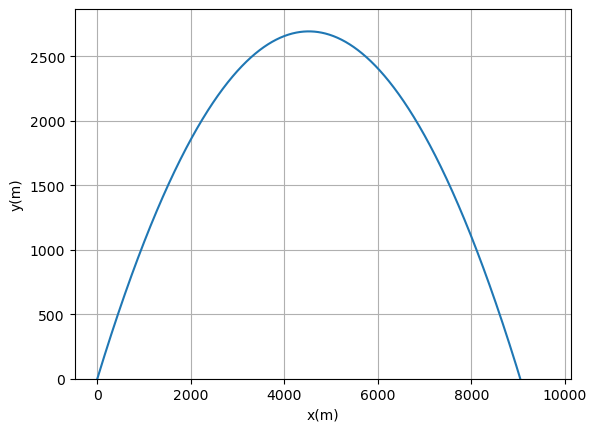

938
Time of impact: 46.95 seconds
Horizontal distance: 9053.07 meters


In [3]:
plt.plot(sol_RK451.y[0],sol_RK451.y[1])
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.ylim(bottom=0)
plt.grid()
plt.show()
x_vals = sol_RK451.y[0]
y_vals = sol_RK451.y[1]  
time_vals = sol_RK451.t 


impact_index = np.where((y_vals <= 0) )[0][1]
print(impact_index)
time_impact = time_vals[impact_index]
horizontal_distance = x_vals[impact_index]

# Output results
print(f"Time of impact: {time_impact:.2f} seconds")
print(f"Horizontal distance: {horizontal_distance:.2f} meters")

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

[[   0.            0.          192.83628291  229.81333294]
 [   9.65146561   11.48989428  192.83628291  229.32284245]
 [  19.30293122   22.95523948  192.83628291  228.83235195]
 ...
 [9622.51121408 -733.33773994  192.83628291 -259.20568608]
 [9632.16267969 -746.32327204  192.83628291 -259.69617657]
 [9641.8141453  -759.33335322  192.83628291 -260.18666706]]


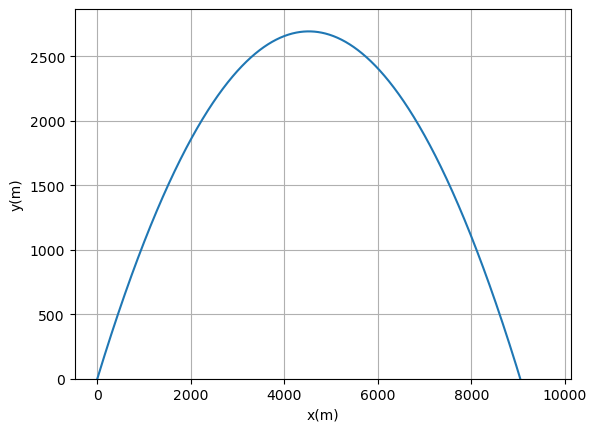

Time of impact: 46.95 seconds
Horizontal distance: 9053.07 meters


In [4]:
#codes
def rungekutta_4(f,t,x0):
    n = len(t)
    x = np.zeros( ( n, len(x0) ) )
    x[0] = x0 #set inital condition 
    for i in range (0,n-1):      
        dt = (t[i+1] - t[i])
        k1 = np.array(f(t[i], x[i]))
        k2 = np.array(f(t[i] + dt/2, x[i] + dt/2 * k1))
        k3 = np.array(f(t[i] + dt/2, x[i] + dt/2 * k2))
        k4 = np.array(f(t[i] + dt, x[i] + dt * k3))
        x[i+1] = x[i] +dt*(k1+2*k2+2*k3+k4)/6             
    return x

sol_rk4 = rungekutta_4(proj_vac,t1,state_0)
print(sol_rk4)
plt.plot(sol_rk4[:,0],sol_rk4[:,1])
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.ylim(bottom=0)
plt.grid()
plt.show()
x_vals = sol_rk4[:,0]
y_vals = sol_rk4[:,1]  
time_vals = t1


impact_index = np.where((y_vals <= 0) )[0][1]
time_impact = time_vals[impact_index]
horizontal_distance = x_vals[impact_index]

# Output results
print(f"Time of impact: {time_impact:.2f} seconds")
print(f"Horizontal distance: {horizontal_distance:.2f} meters")

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?
The graphs look identical and have the same time and distance.

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_x' = - c/m \sqrt(v_x^2+v_y^2) v_y $

* $x' = v_x$

* $v_y' = -g - c/m \sqrt(v_x^2+v_y^2) v_y $

* $y' = v_y $

Code the equations into a function

In [5]:
def proj_vac(t,state):
    g=9.8
    rho= 7800
    D=0.15
    gamma = 0.25
    c= gamma*D**2
    m=rho*(4/3*np.pi*(D/2)**3)
    x = state[0]
    y = state[1]
    
    x_dot = state[2]
    y_dot = state[3]
    
    x_ddot = - c/m*(x_dot**2 + y_dot**2)**(1/2)*x_dot
    y_ddot = -g - c/m*(x_dot**2 + y_dot**2)**(1/2)*y_dot
    
    dstate_dt = [x_dot, y_dot, x_ddot, y_ddot]
    return dstate_dt

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [6]:
t0=0
tf=35
t1=np.linspace(t0,tf,1000)
sol_RK452 = integrate.solve_ivp(proj_vac,(t0,tf),state_0,method='RK45', t_eval=t1)
print(sol_RK452)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.504e-02 ...  3.496e+01  3.500e+01]
        y: [[ 0.000e+00  6.742e+00 ...  2.831e+03  2.832e+03]
            [ 0.000e+00  8.028e+00 ... -4.728e+02 -4.774e+02]
            [ 1.928e+02  1.920e+02 ...  3.344e+01  3.337e+01]
            [ 2.298e+02  2.285e+02 ... -1.312e+02 -1.313e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0


Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

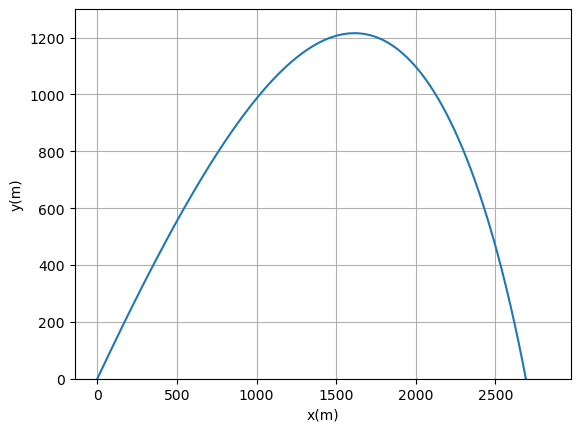

Time of impact: 31.22 seconds
Horizontal distance: 2692.14 meters


In [7]:
plt.plot(sol_RK452.y[0],sol_RK452.y[1])
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.ylim(bottom=0)
plt.grid()
plt.show()

x_vals = sol_RK452.y[0]
y_vals = sol_RK452.y[1]  
time_vals = sol_RK452.t 


impact_index = np.where((y_vals <= 0) )[0][1]
time_impact = time_vals[impact_index]
horizontal_distance = x_vals[impact_index]

# Output results
print(f"Time of impact: {time_impact:.2f} seconds")
print(f"Horizontal distance: {horizontal_distance:.2f} meters")

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' = - \gamma D^2 e^{-y/\lambda}/m \sqrt(v_x^2+v_y^2) v_y $

* $x' = v_x$

* $v_y' = -g - \gamma D^2 e^{-y/\lambda}/m \sqrt(v_x^2+v_y^2) v_y $

* $y' = v_y $

Code the equations into a function

In [12]:
def proj_vac(t,state):
    g=9.8
    rho= 7800
    D=0.15
    gamma = 0.25
    lamb=10000
    
    m=rho*(4/3*np.pi*(D/2)**3)
    x = state[0]
    y = state[1]
    
    x_dot = state[2]
    y_dot = state[3]
    
    x_ddot = - gamma*D**2*np.exp(-y/lamb)/m*(x_dot**2 + y_dot**2)**(1/2)*x_dot
    y_ddot = -g - gamma*D**2*np.exp(-y/lamb)/m*(x_dot**2 + y_dot**2)**(1/2)*y_dot
    
    dstate_dt = [x_dot, y_dot, x_ddot, y_ddot]
    return dstate_dt

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [13]:
t0=0
tf=35
t1=np.linspace(t0,tf,1000)
sol_RK453 = integrate.solve_ivp(proj_vac,(t0,tf),state_0,method='RK45', t_eval=t1)
print(sol_RK453)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.504e-02 ...  3.496e+01  3.500e+01]
        y: [[ 0.000e+00  6.742e+00 ...  2.944e+03  2.945e+03]
            [ 0.000e+00  8.028e+00 ... -4.275e+02 -4.321e+02]
            [ 1.928e+02  1.920e+02 ...  3.607e+01  3.600e+01]
            [ 2.298e+02  2.285e+02 ... -1.308e+02 -1.309e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0


Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

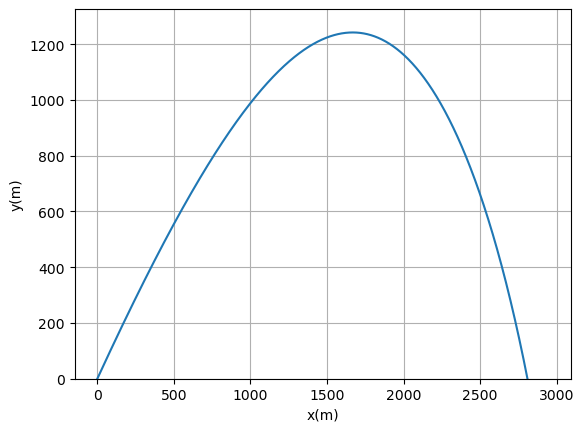

Time of impact: 31.60 seconds
Horizontal distance: 2810.44 meters


In [14]:
plt.plot(sol_RK453.y[0],sol_RK453.y[1])
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.ylim(bottom=0)
plt.grid()
plt.show()

x_vals = sol_RK453.y[0]
y_vals = sol_RK453.y[1]  
time_vals = sol_RK453.t 


impact_index = np.where((y_vals <= 0) )[0][1]
time_impact = time_vals[impact_index]
horizontal_distance = x_vals[impact_index]

# Output results
print(f"Time of impact: {time_impact:.2f} seconds")
print(f"Horizontal distance: {horizontal_distance:.2f} meters")

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

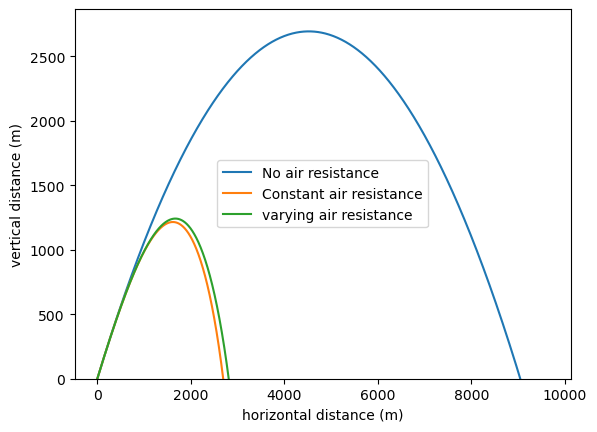

In [15]:

plt.plot(sol_RK451.y[0], sol_RK451.y[1], label="No air resistance")
plt.plot(sol_RK452.y[0], sol_RK452.y[1], label="Constant air resistance")
plt.plot(sol_RK453.y[0], sol_RK453.y[1], label="varying air resistance")


plt.xlabel('horizontal distance (m)') 
plt.ylabel('vertical distance (m)')  
plt.ylim(bottom=0)
plt.legend()


plt.show()

Your results should look like the plot below.

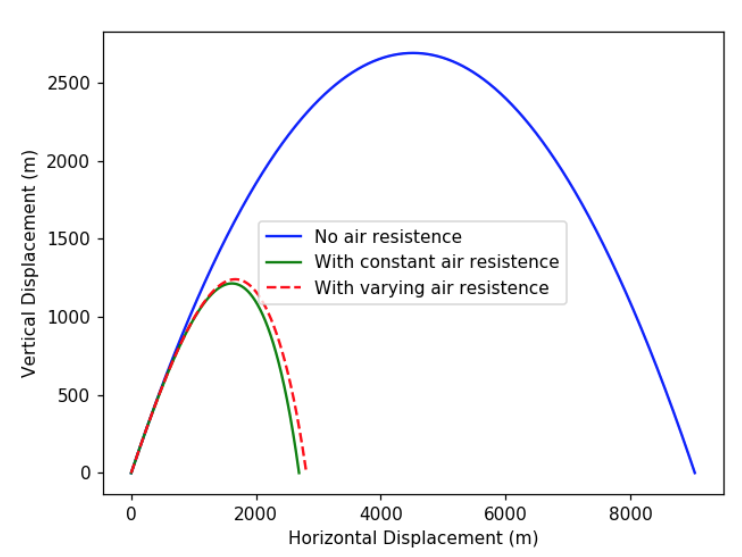

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**